In [1]:
import numpy as np
import spacecharger as sc
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import RegularGridInterpolator

In [92]:
lab_E, lab_B, xx, zz = sc.routine("input_file.py")

In [ ]:
def closestVal(val, array, dx = None):
    if dx == None:
        dx = array[1] - array[0]

    # clip val to be in the array
    val = np.clip(val, array[0], array[-1])


In [139]:
idx = closestVal(1E-4, xx)
idy = closestVal(0, xx)
idz = closestVal(0.0, zz)


ER_values = lab_E[:, 3, :, 0]  # shape (5,33)
EZ_values = lab_E[:, 3, :, 2]  # shape (5,33)
print("ER_values shape:", ER_values.shape)
print("EZ_values shape:", ER_values.shape)
ERint = RegularGridInterpolator((xx, zz), ER_values)
EZint = RegularGridInterpolator((xx, zz), EZ_values)

value = ERint([0.0001, 0.000])
print(value)

ER_values shape: (5, 33)
EZ_values shape: (5, 33)
[7.61003149e+16]


-0.0003992049308441573 0.0003992049308441573


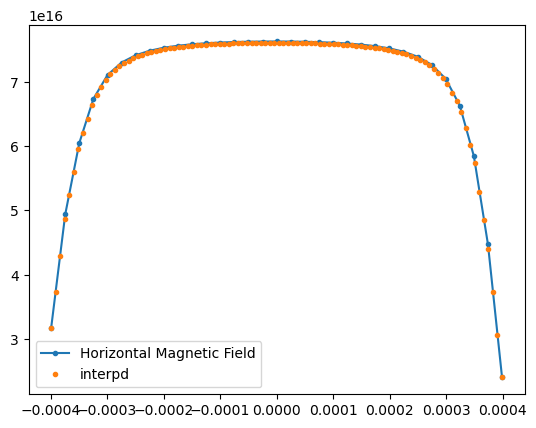

In [160]:
plt.plot(zz, lab_E[0, 3, :][:,0], '.-', label="Horizontal Magnetic Field")


print(zz[0], zz[-1])
z_superdense = np.linspace(zz[0], zz[-1], num=100)
erw = [ERint([1e-4, z]) for z in z_superdense]
wre = [EZint([1e-4, z]) for z in z_superdense]

# now i have the radial and electric fields for any z and r

plt.plot(z_superdense, erw, '.',label="interpd")
plt.legend()

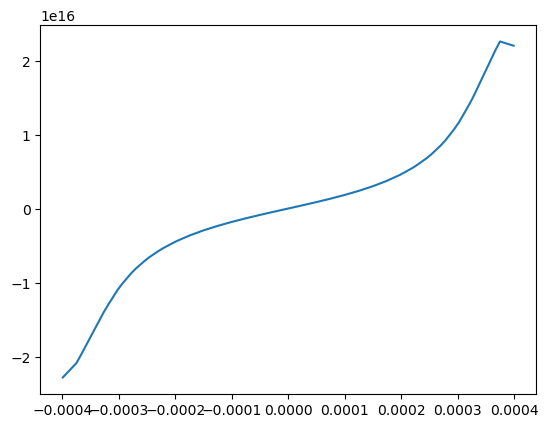

In [ ]:
plt.plot(z_superdense, wre)